In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')

/tmp/ipykernel_87435/3712370352.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gdata = pd.read_csv('/mnt/home/depreeja/GData2.csv')


In [2]:
# Find the categorical columns
categorical_cols = ['changeconfirmeddeliverydate', 'changecontract', 'changecurrency',
                                   'changedeliveryindicator', 'changefinalinvoiceindicator',
                                   'changeoutwarddeliveryindicator', 'changeprice', 'changequantity',
                                   'changerequesteddeliverydate', 'changestoragelocation',
                                   'BUKRS', 'MATKL', 'ESTKZ', 'BSART', 'LGORT',
                                   #'MATNR', 
                                   'PSTYP', 'WERKS', 'ERNAM', 'LIFNR', 'SHKZG']
numerical_cols = ['deliverydaysexpected', 'scheduledshipdays', 'approvaldays', 'NETPR',
                            'numdelivery']

In [12]:
lateGR = gdata['lateGR']

# Calculate the frequency that 'lateGR' is positive for every value of 'ERNAM'
ERNAM_lateGR = gdata[['ERNAM', 'lateGR']]
top_ERNAM = gdata['ERNAM'].value_counts().index[:10]
ERNAM_lateGR = ERNAM_lateGR[ERNAM_lateGR['ERNAM'].isin(top_ERNAM)]
ERNAM_lateGR = ERNAM_lateGR.groupby('ERNAM').mean()
ERNAM_lateGR = ERNAM_lateGR.sort_values('lateGR', ascending=False)

# Calculate the frequency that 'lateGR' is positive for every value of 'LIFNR'
LIFNR_lateGR = gdata[['LIFNR', 'lateGR']]
top_LIFNR = gdata['LIFNR'].value_counts().index[:10]
LIFNR_lateGR = LIFNR_lateGR[LIFNR_lateGR['LIFNR'].isin(top_LIFNR)]
LIFNR_lateGR = LIFNR_lateGR.groupby('LIFNR').mean()
LIFNR_lateGR = LIFNR_lateGR.sort_values('lateGR', ascending=False)

# Calculate the frequency that 'lateGR' is positive for every value of 'ESTKZ'
ESTKZ_lateGR = gdata[['ESTKZ', 'lateGR']]
top_ESTKZ = gdata['ESTKZ'].value_counts().index[:10]
ESTKZ_lateGR = ESTKZ_lateGR[ESTKZ_lateGR['ESTKZ'].isin(top_ESTKZ)]
ESTKZ_lateGR = ESTKZ_lateGR.groupby('ESTKZ').mean()
ESTKZ_lateGR = ESTKZ_lateGR.sort_values('lateGR', ascending=False)

# Calculate the frequency that 'lateGR' is positive for every value of 'PSTYP'
PSTYP_lateGR = gdata[['PSTYP', 'lateGR']]
top_PSTYP = gdata['PSTYP'].value_counts().index[:10]
PSTYP_lateGR = PSTYP_lateGR[PSTYP_lateGR['PSTYP'].isin(top_PSTYP)]
PSTYP_lateGR = PSTYP_lateGR.groupby('PSTYP').mean()
PSTYP_lateGR = PSTYP_lateGR.sort_values('lateGR', ascending=False)

# Calculate the frequency that 'lateGR' is positive for every value of 'MATKL'
MATKL_lateGR = gdata[['MATKL', 'lateGR']]
top_MATKL = gdata['MATKL'].value_counts().index[:10]
MATKL_lateGR = MATKL_lateGR[MATKL_lateGR['MATKL'].isin(top_MATKL)]
MATKL_lateGR = MATKL_lateGR.groupby('MATKL').mean()
MATKL_lateGR = MATKL_lateGR.sort_values('lateGR', ascending=False)

# Calculate the frequency that 'lateGR' is positive for every value of 'BSART'
BSART_lateGR = gdata[['BSART', 'lateGR']]
top_BSART = gdata['BSART'].value_counts().index[:10]
BSART_lateGR = BSART_lateGR[BSART_lateGR['BSART'].isin(top_BSART)]
BSART_lateGR = BSART_lateGR.groupby('BSART').mean()
BSART_lateGR = BSART_lateGR.sort_values('lateGR', ascending=False)

# Store the results in a dictionary
lateGR_freq = {}
lateGR_freq['ERNAM'] = ERNAM_lateGR
lateGR_freq['LIFNR'] = LIFNR_lateGR
lateGR_freq['ESTKZ'] = ESTKZ_lateGR
lateGR_freq['PSTYP'] = PSTYP_lateGR
lateGR_freq['MATKL'] = MATKL_lateGR
lateGR_freq['BSART'] = BSART_lateGR

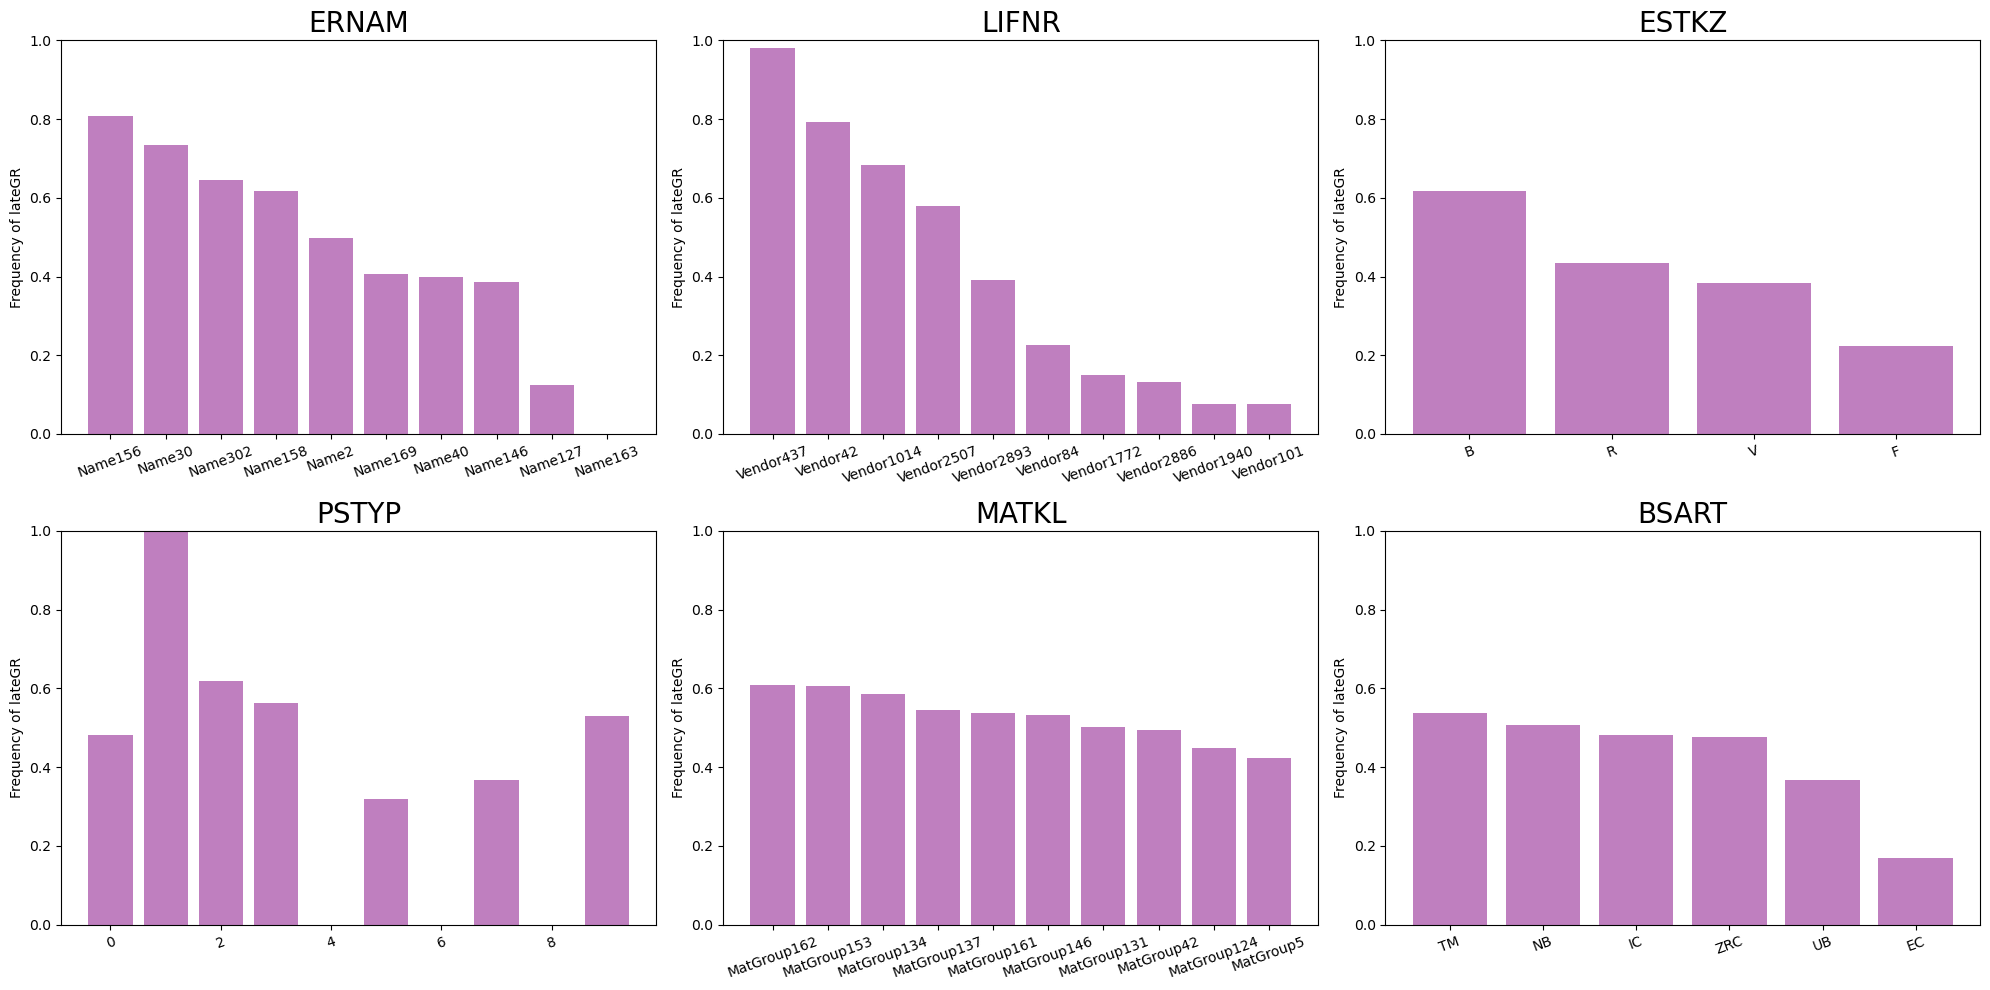

In [19]:
# Plot the frequencies from lateGR_freq
plt.figure(figsize=(20, 10))

for i, key in enumerate(lateGR_freq.keys()):
    plt.subplot(2, 3, i+1)
    plt.bar(lateGR_freq[key].index, lateGR_freq[key]['lateGR'], alpha=0.5, color='purple')
    plt.ylabel('Frequency of lateGR')
    plt.title(key, fontsize=20)
    plt.xticks(rotation=20)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

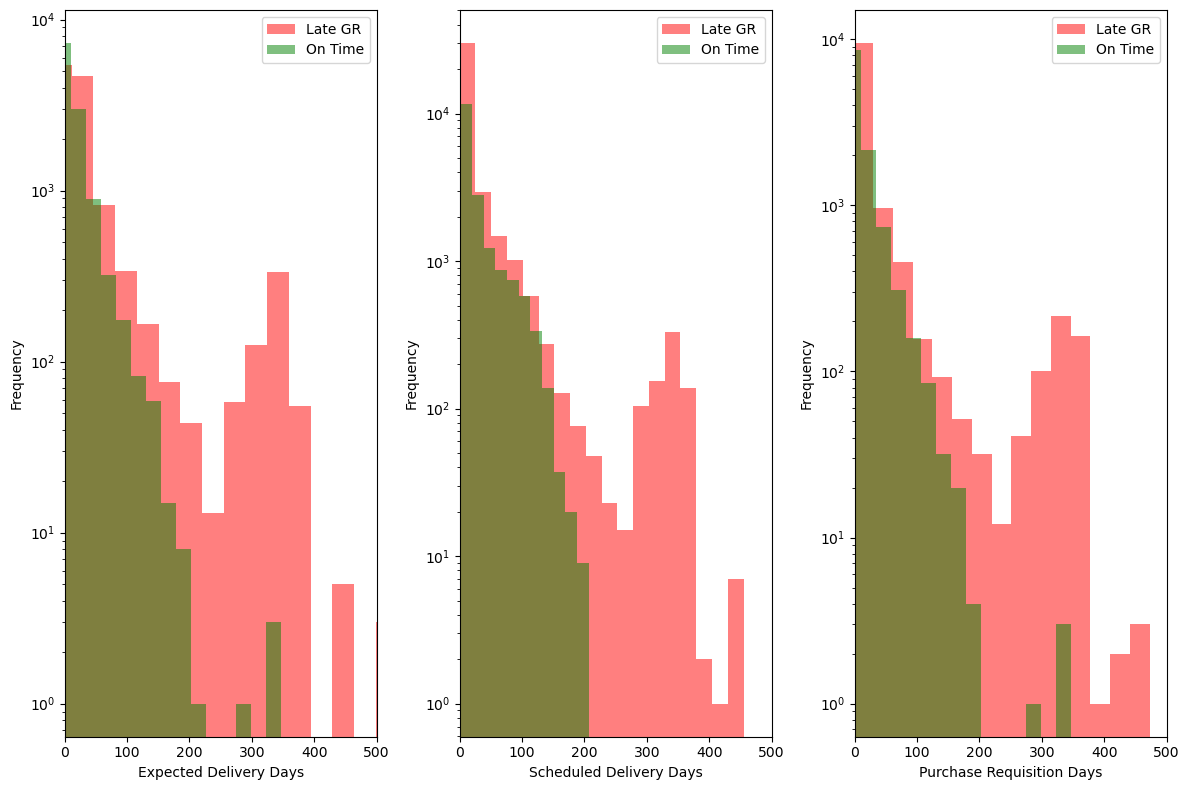

In [29]:
# Get the data of lateGR == 1 for 'deliverydaysexpected', 'scheduledshipdays', 'approvaldays'
lateGR_data1 = gdata[gdata['lateGR'] == 1][['deliverydaysexpected', 'scheduledshipdays', 'approvaldays']]

# Get the data of lateGR == 0 for 'deliverydaysexpected', 'scheduledshipdays', 'approvaldays'
lateGR_data0 = gdata[gdata['lateGR'] == 0][['deliverydaysexpected', 'scheduledshipdays', 'approvaldays']]

# Plot the histograms of 'deliverydaysexpected', 'scheduledshipdays', 'approvaldays' 
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
# Plot the histogram of 'deliverydaysexpected' for lateGR == 1 and lateGR == 0
plt.hist(lateGR_data1['deliverydaysexpected'], bins=50, alpha=0.5, color='red', label='Late GR')
plt.hist(lateGR_data0['deliverydaysexpected'], bins=50, alpha=0.5, color='green', label='On Time')
plt.xlabel('Expected Delivery Days')
plt.xlim(0, 500)
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()

plt.subplot(1, 3, 2)
# Plot the histogram of 'scheduledshipdays' for lateGR == 1 and lateGR == 0
plt.hist(lateGR_data1['scheduledshipdays'], bins=50, alpha=0.5, color='red', label='Late GR')
plt.hist(lateGR_data0['scheduledshipdays'], bins=50, alpha=0.5, color='green', label='On Time')
plt.xlabel('Scheduled Delivery Days')
plt.xlim(0, 500)
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()

plt.subplot(1, 3, 3)
# Plot the histogram of 'approvaldays' for lateGR == 1 and lateGR == 0
plt.hist(lateGR_data1['approvaldays'], bins=50, alpha=0.5, color='red', label='Late GR')
plt.hist(lateGR_data0['approvaldays'], bins=50, alpha=0.5, color='green', label='On Time')
plt.xlabel('Purchase Requisition Days')
plt.xlim(0, 500)
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()